In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
import random
from sklearn.metrics import r2_score

In [14]:
data = pd.read_csv('insurance - insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
data['sex'].replace('female', 0, inplace=True)
data['sex'].replace('male', 1, inplace = True )
data['sex'] = data['sex'].astype('int64')

data['smoker'].replace('yes', 1, inplace = True)
data['smoker'].replace('no', 0, inplace=True)
data['smoker'] = data['smoker'].astype('int64')

In [17]:
region_cols = pd.get_dummies(data['region'], prefix='region', dtype=int)
region_cols.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [18]:
X = pd.concat([data[['age', 'sex', 'bmi', 'children', 'smoker']], region_cols], axis = 1)
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


<Axes: >

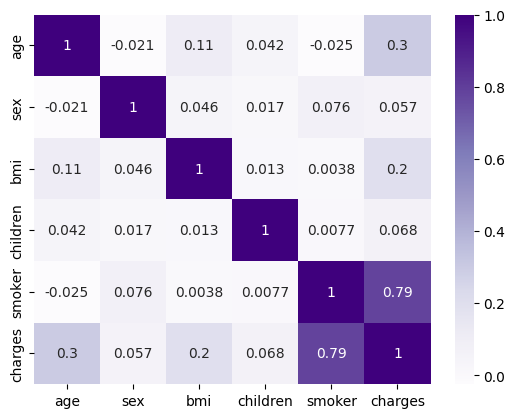

In [19]:
numeric_data = data.select_dtypes(include=['float64', 'int64']) 

merged_data = pd.concat([numeric_data], axis=1) 

corr = merged_data.corr() 
sns.heatmap(corr, cmap='Purples', annot=True)

In [20]:
y = data['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [22]:
# градиентный спуск


# среднеквадратичная ошибка 
def mistake_mse(X, y, theta): # X- матрица признаков, y-вектор целевой переменной, theta-вектор параметров модели
    m = len(y) # вычисляем количество образцов в данных
    cost = (1./m) * np.sum((X.dot(theta) - y) ** 2) #сумма квадратов разности между прогнозными значениями и истинными значениями целевой переменной, деленная на количество образцов.
    return cost

def gradient_descent(X, y, learning_rate, iterations): 
    X = np.hstack((np.ones((X.shape[0], 1)), X)) 
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations, 1))
    
    for i in range(iterations):
        params = params - (2./m * learning_rate * np.dot(X.T, (np.dot(X, params) - y)))
        cost_track[i] = mistake_mse(X, y, params)
    
    return cost_track, params

In [23]:
def predict(X, params):
   X = np.hstack((np.ones((X.shape[0], 1)), X))
   return np.dot(X, params)

In [24]:
track, weights = gradient_descent(X_train, y_train, 0.0003, 100000)

print(weights)

y_pred = predict(X_test, weights)
r2_score(y_test, y_pred)

[-8305.35428154   260.61021544  -540.34788426   275.02339139
   389.50106859 24430.95891499 -1518.56333104 -1721.81361914
 -2464.37439996 -2598.85022127]


c:\Users\Ustin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Ustin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.7137568671276955

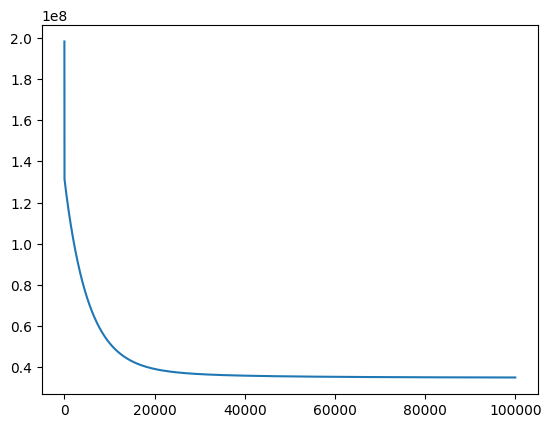

In [25]:
plt.plot(track)